In [1]:
import omega500analysistools.IO.load_db as load_db
database = '/Users/hqchen/filacf/Omega500/databases/L500_NR_0.db'

In [112]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

from mergertree, get z0_parent_id, child_id, child_aexp, is_main_line 

from halos, according to the selection from mergertree (match aexp,id), get M_total_500c 

add another sheet super mergertree, with columns z0_parent_id, parent_aexp/id, child_aexp/id, parent/child M_total_500c

and plot aexp vs. M_total_500c

In [ ]:
df=load_db.return_table(database)

In [57]:
df.keys()

['halos', 'mergertree', 'mergers', 'profiles']

In [237]:
print df['halos'].columns
print df['mergertree'].columns


Index([u'id', u'x', u'y', u'z', u'vx', u'vy', u'vz', u'r_hc', u'M_hc',
       u'num_particles', u'vmax_hc', u'rmax_hc', u'aexp', u'r200m',
       u'M_dark_200m', u'M_gas_200m', u'M_gas_cold_200m', u'M_star_200m',
       u'M_star_new_200m', u'M_baryon_200m', u'M_total_200m', u'vmax_200m',
       u'rmax_200m', u'gas-Z_II_avg_200m', u'gas-Z_Ia_avg_200m',
       u'star-Z_II_avg_200m', u'star-Z_Ia_avg_200m', u'star_new-Z_II_avg_200m',
       u'star_new-Z_Ia_avg_200m', u'star-age_avg_200m', u'r500c',
       u'M_dark_500c', u'M_gas_500c', u'M_gas_cold_500c', u'M_star_500c',
       u'M_star_new_500c', u'M_baryon_500c', u'M_total_500c', u'vmax_500c',
       u'rmax_500c', u'gas-Z_II_avg_500c', u'gas-Z_Ia_avg_500c',
       u'star-Z_II_avg_500c', u'star-Z_Ia_avg_500c', u'star_new-Z_II_avg_500c',
       u'star_new-Z_Ia_avg_500c', u'star-age_avg_500c', u'r200c',
       u'M_dark_200c', u'M_gas_200c', u'M_gas_cold_200c', u'M_star_200c',
       u'M_star_new_200c', u'M_baryon_200c', u'M_total_200c', u'v

In [250]:
#smt=pd.DataFrame({'child_aexp': [], 'child_id': [], 'z0_parent_id': [], 'M_total_200m': [], 'M_total_200c':[],'M_total_500c':[]})
smt=pd.DataFrame()
znow=1.0005
smt

""


In [251]:
allz0id=df['halos'][df['halos']['aexp']==znow]['id'].as_matrix()
print allz0id

[  1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  19  21
  23  25  26  27  29  31  32  33  34  35  39  42  44  45  49  50  53  54
  55  59  61  63  65  66  68  69  71  73  77  78  79  80  81  82  83  85
  86  88  91  96  98 100 104 106 108 125 131 132 135 140 146 149 153 156
 161 175 200 201 217 223 229 248 284 298 434 471 732]


In [255]:
for CLid in allz0id:
	sel_parent_mainline=((df['mergertree']['z0_parent_id']==CLid) & (df['mergertree']['is_main_line']==1))
	smt_each=df['mergertree'][sel_parent_mainline][['child_aexp','child_id','z0_parent_id']]
	length=smt_each.count()[0]
	
	tmp_M_total_200m=[]
	tmp_M_total_200c=[]
	tmp_M_total_500c=[]
	for i in range(length):
	    pinpoint=((df['halos']['aexp']==smt_each.iloc[i]['child_aexp'] )&\
	       (df['halos']['id']==smt_each.iloc[i]['child_id']))
	    tmp_M_total_200m.append(df['halos'][pinpoint]['M_total_200m'].as_matrix()[0])
	    tmp_M_total_200c.append(df['halos'][pinpoint]['M_total_200c'].as_matrix()[0])
	    tmp_M_total_500c.append(df['halos'][pinpoint]['M_total_500c'].as_matrix()[0])
	smt_each['M_total_200m']=tmp_M_total_200m
	smt_each['M_total_200c']=tmp_M_total_200c
	smt_each['M_total_500c']=tmp_M_total_500c
	pinpoint=((df['halos']['aexp']==znow)&\
	       (df['halos']['id']==smt_each.iloc[0]['z0_parent_id']))
	tmp_M_total_200m=df['halos'][pinpoint]['M_total_200m'].as_matrix()[0]
	tmp_M_total_200c=df['halos'][pinpoint]['M_total_200c'].as_matrix()[0]
	tmp_M_total_500c=df['halos'][pinpoint]['M_total_500c'].as_matrix()[0]
	
	parent_row=[znow,int(smt_each.iloc[0]['z0_parent_id']),int(smt_each.iloc[0]['z0_parent_id']),tmp_M_total_200m,tmp_M_total_200c,tmp_M_total_500c]
	#print 'each',smt_each
	smt_each.loc[-1]=parent_row
	smt_each.index = smt_each.index + 1  # shifting index
	smt_each = smt_each.sort_index()  # sorting by index
	smt=smt.append(smt_each,ignore_index=True); #print 'all',smt


In [258]:
smt.rename(columns={'child_aexp': 'aexp', 'child_id': 'id'}, inplace=True)
smt

,aexp,id,z0_parent_id,M_total_200m,M_total_200c,M_total_500c
0,1.0005,1.0,1.0,8.612500e+14,5.840800e+14,4.058300e+14
1,0.9764,1.0,1.0,8.310400e+14,5.860000e+14,4.095000e+14
86,0.9510,3.0,1.0,8.127400e+14,6.025700e+14,4.147700e+14
173,0.9265,11.0,1.0,7.911300e+14,5.903500e+14,4.442300e+14
265,0.9001,4.0,1.0,7.696100e+14,5.831200e+14,4.161700e+14
345,0.8783,5.0,1.0,7.508000e+14,5.736200e+14,3.927500e+14
429,0.8514,11.0,1.0,7.186100e+14,5.448200e+14,3.421400e+14
521,0.8264,4.0,1.0,6.865500e+14,4.985600e+14,3.485500e+14
600,0.8011,17.0,1.0,6.127200e+14,4.819400e+14,3.441700e+14
696,0.7780,12.0,1.0,5.843600e+14,4.661000e+14,3.367400e+14


In [264]:
groupbyz0id=smt.groupby('z0_parent_id')

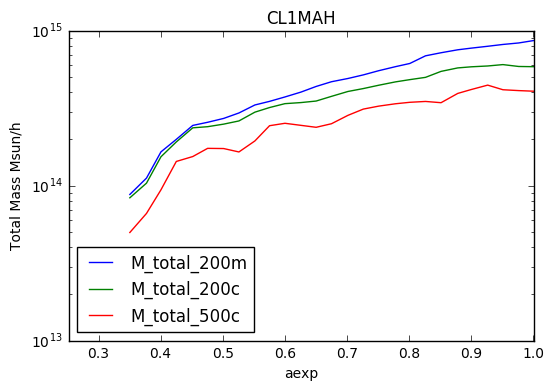

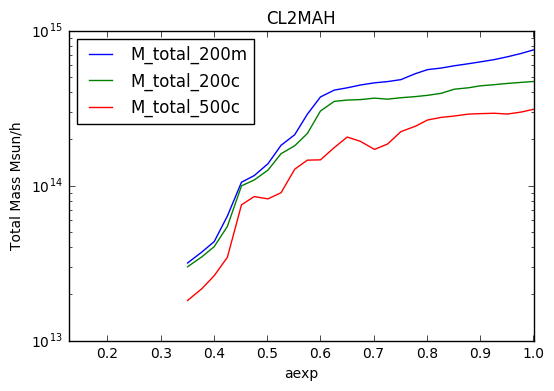

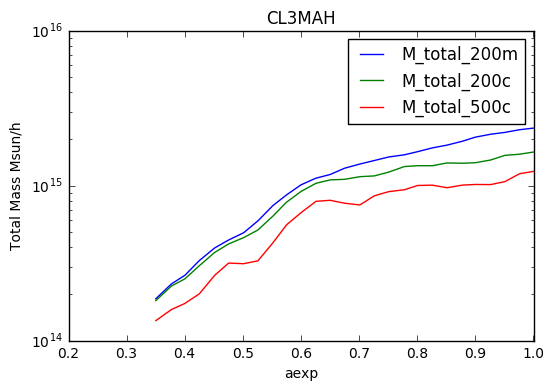

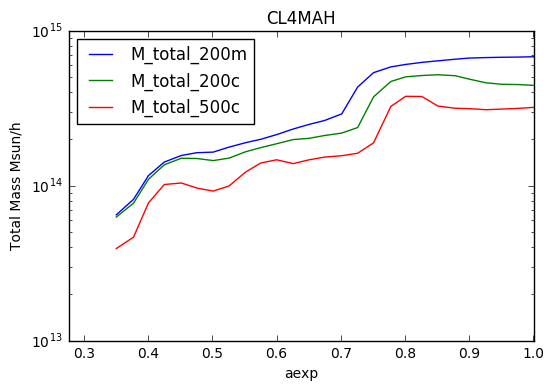

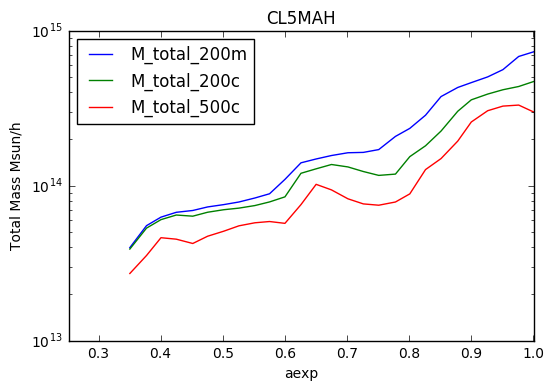

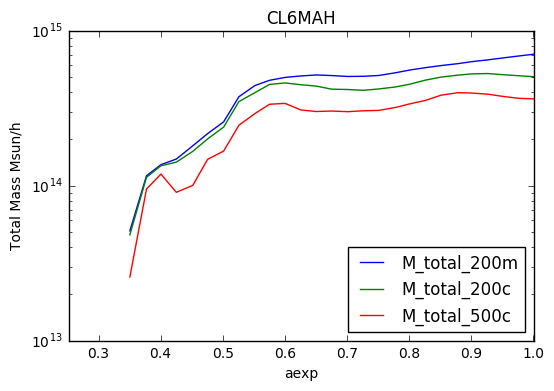

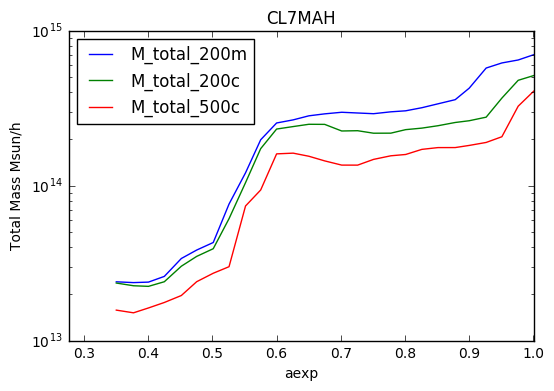

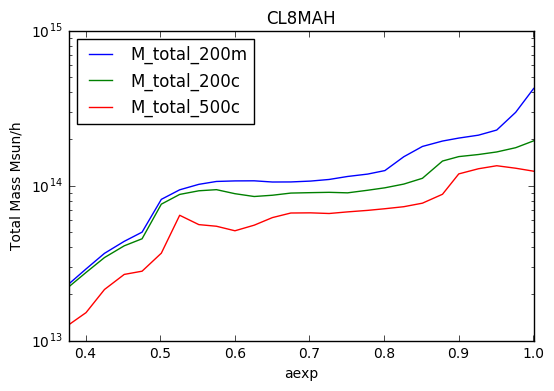

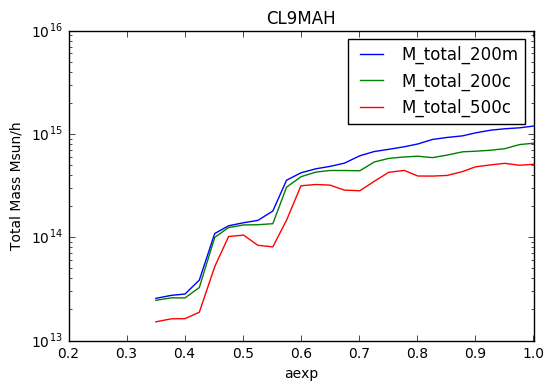

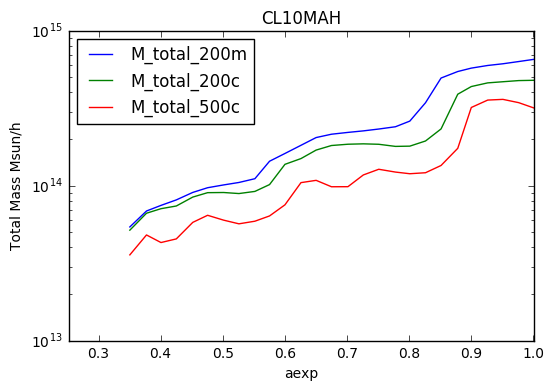

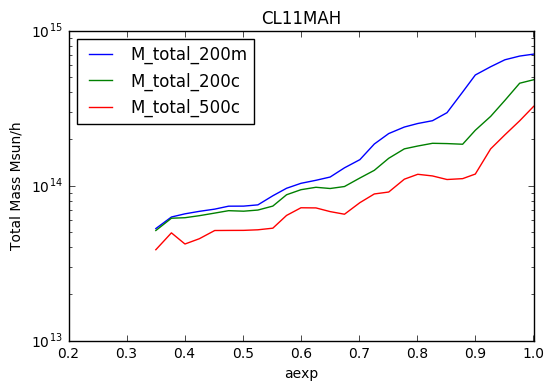

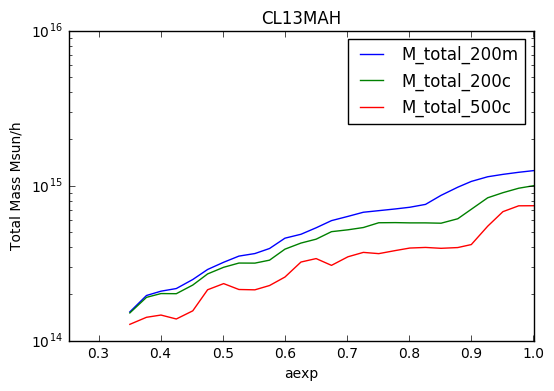

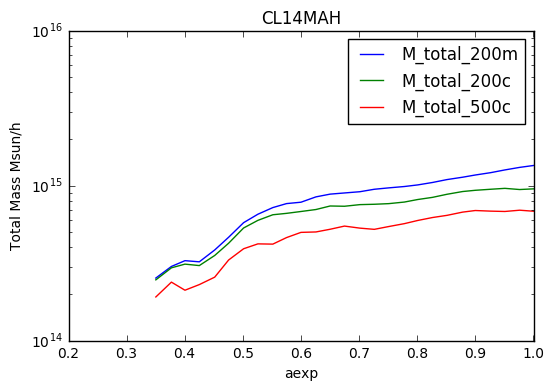

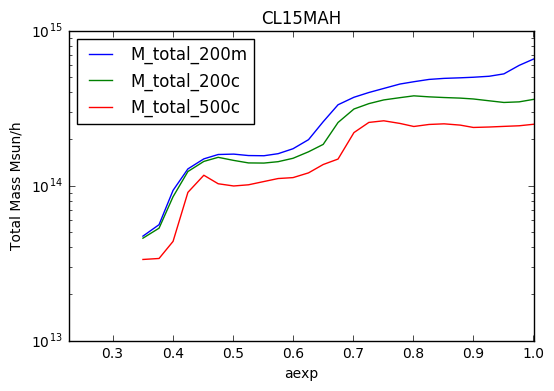

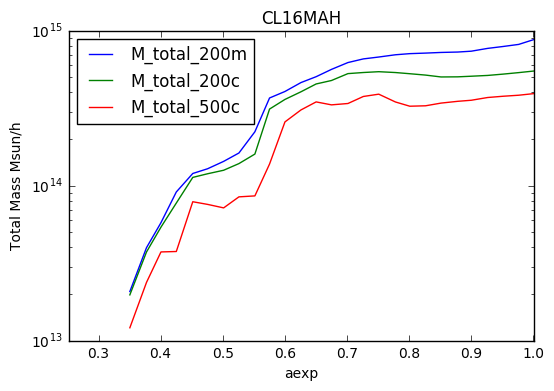

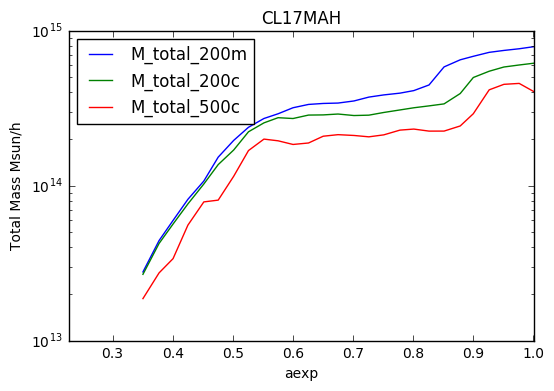

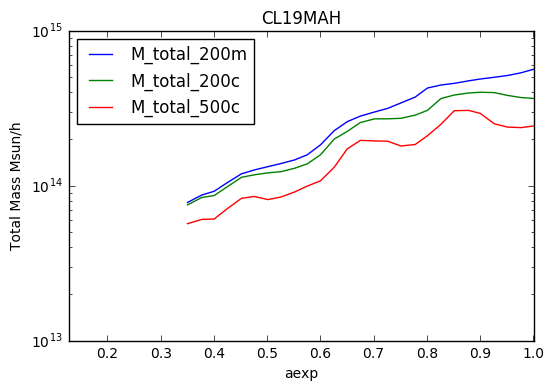

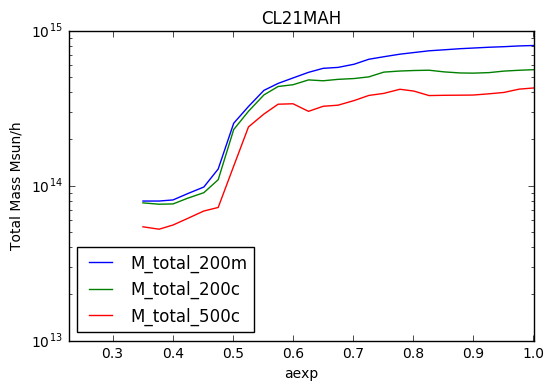

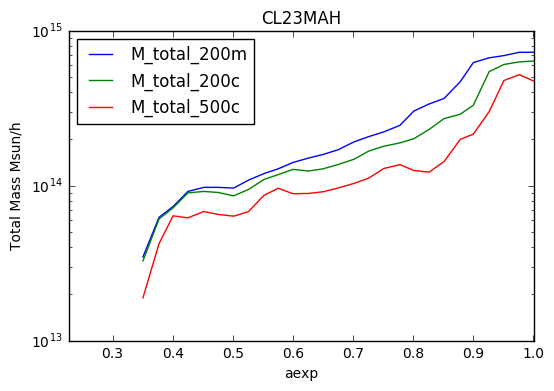

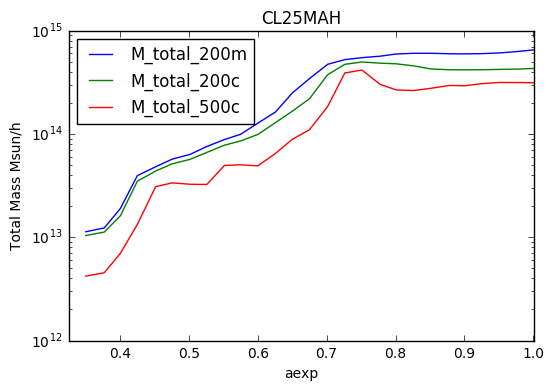

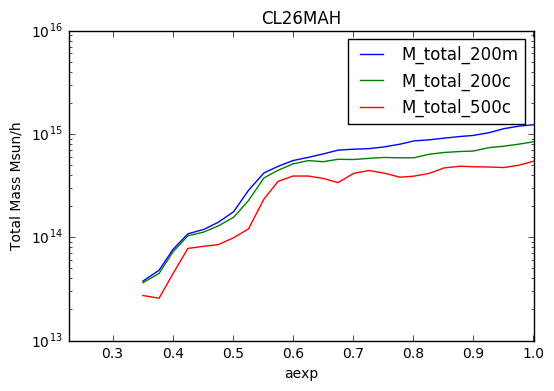

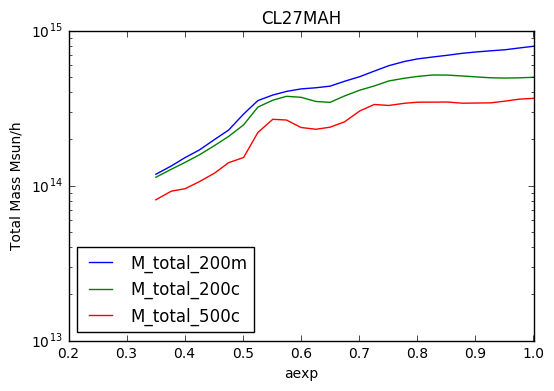

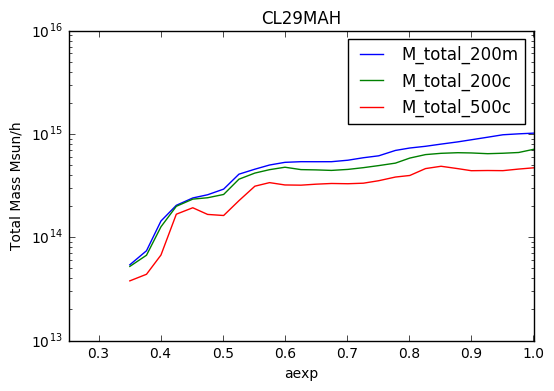

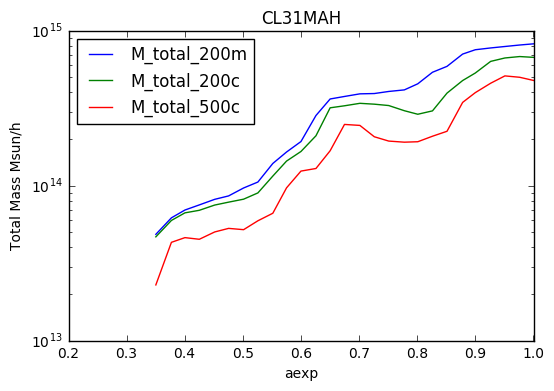

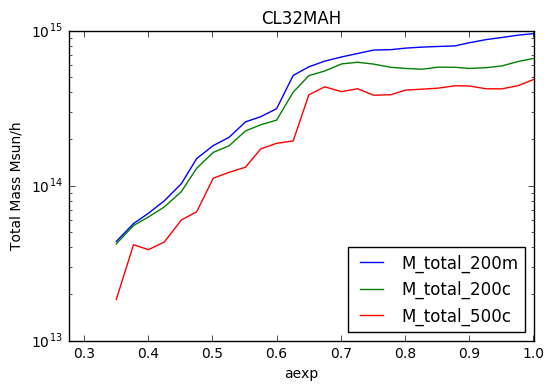

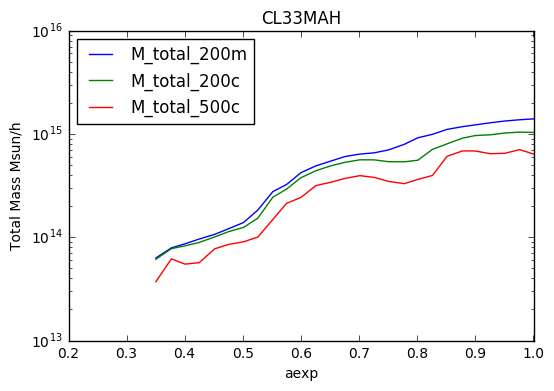

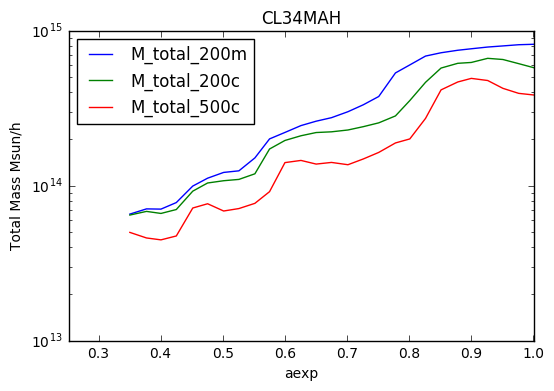

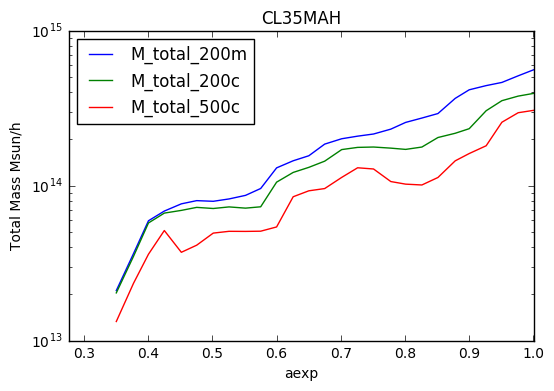

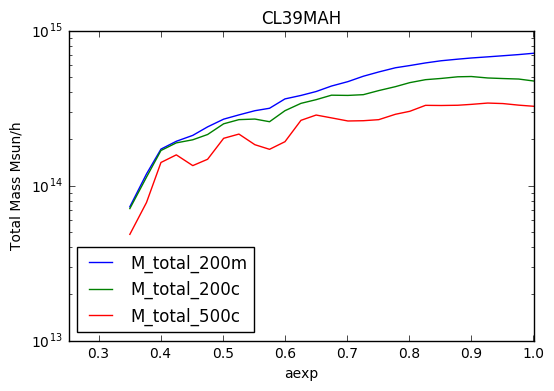

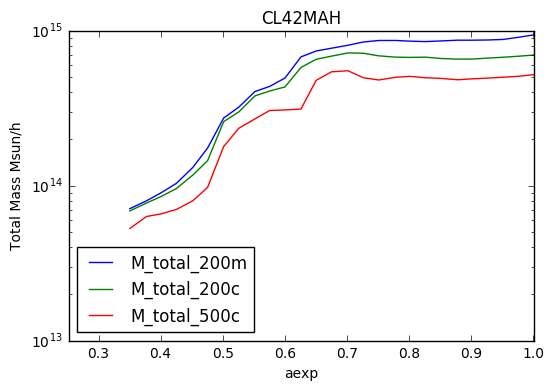

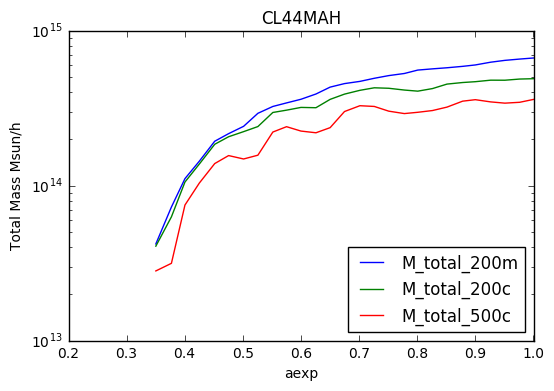

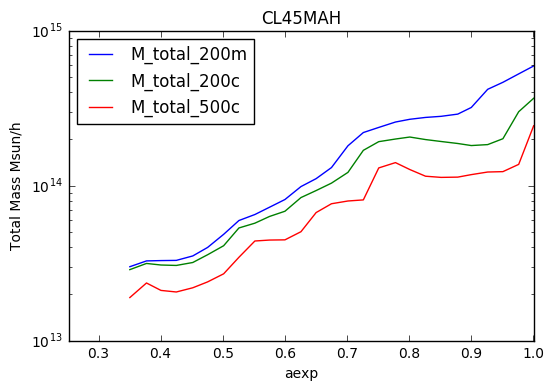

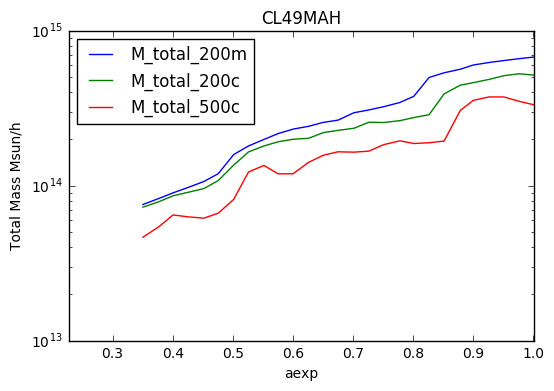

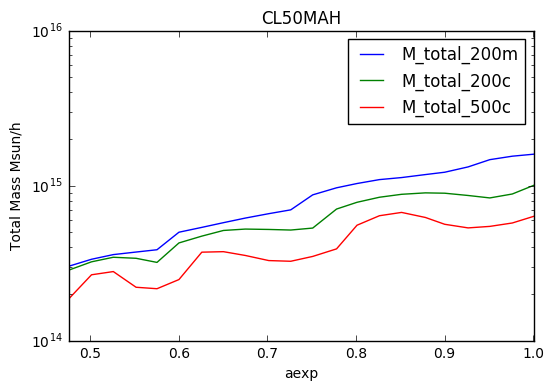

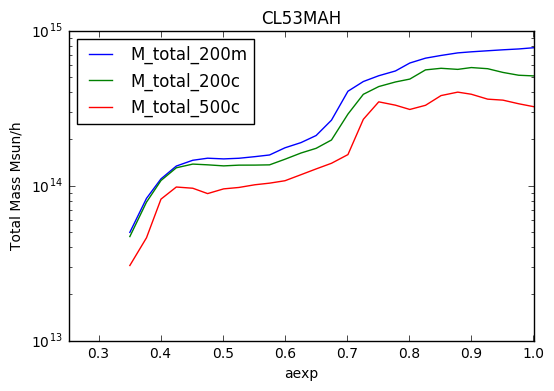

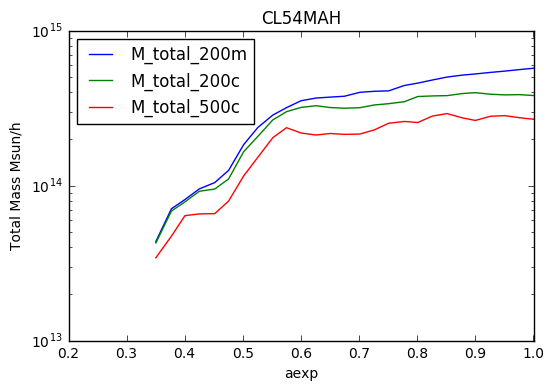

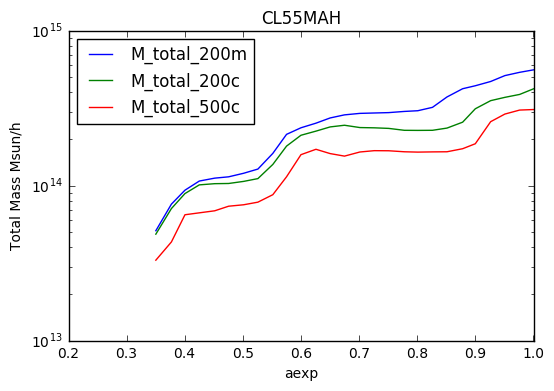

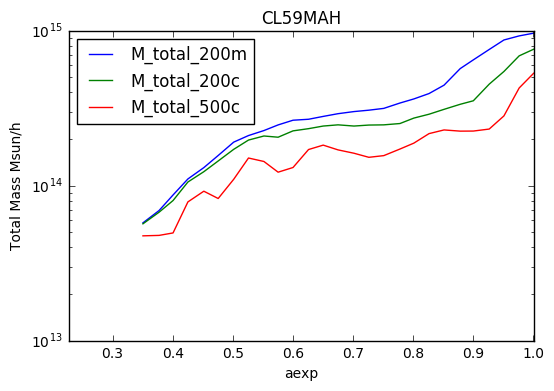

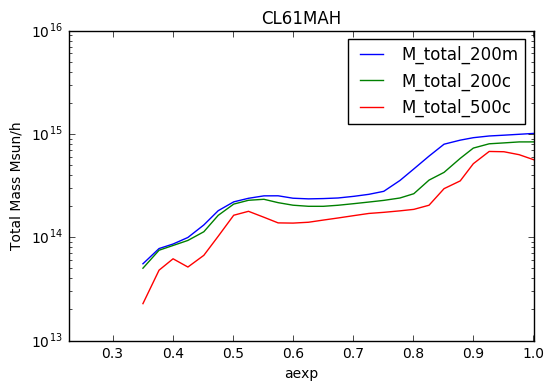

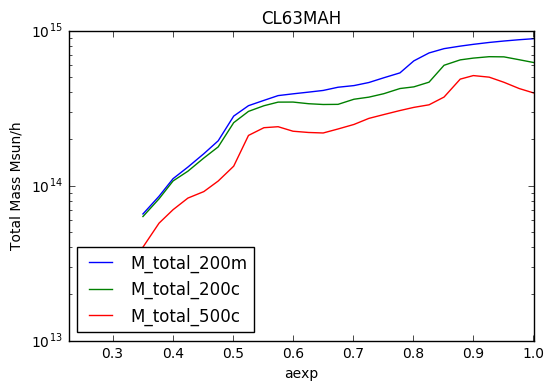

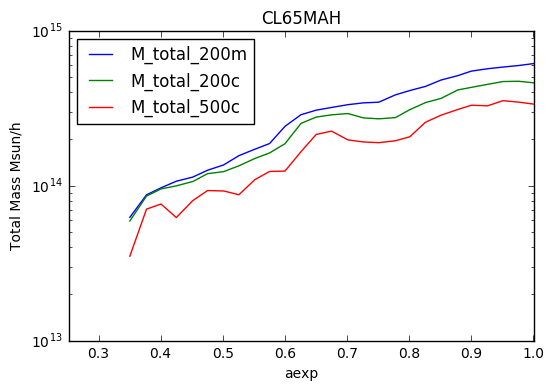

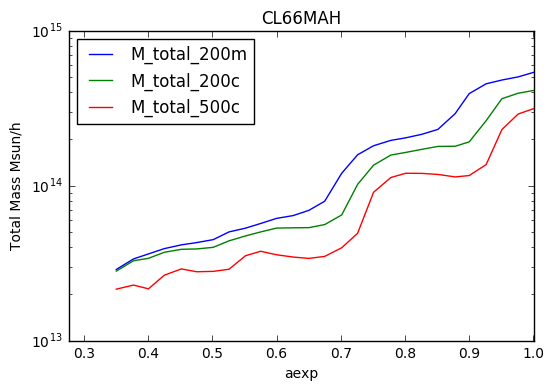

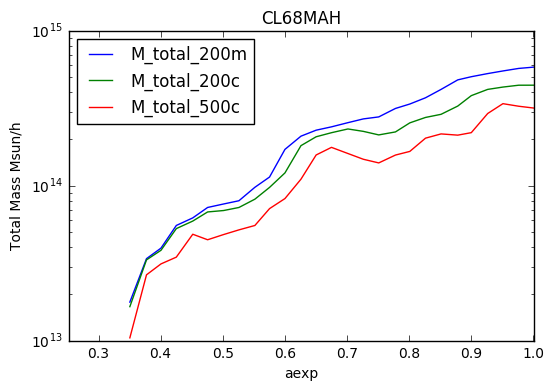

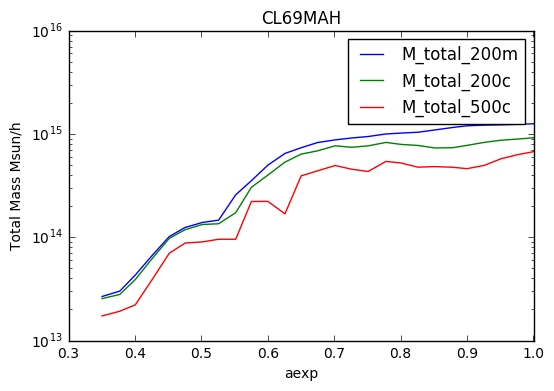

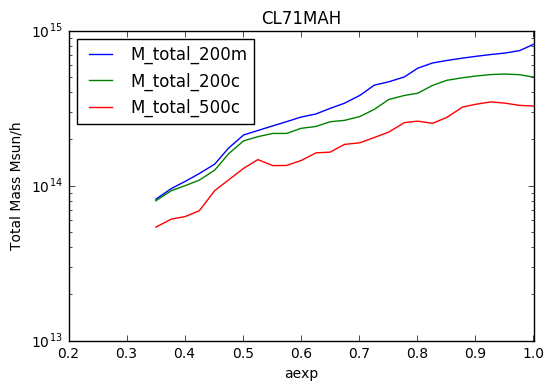

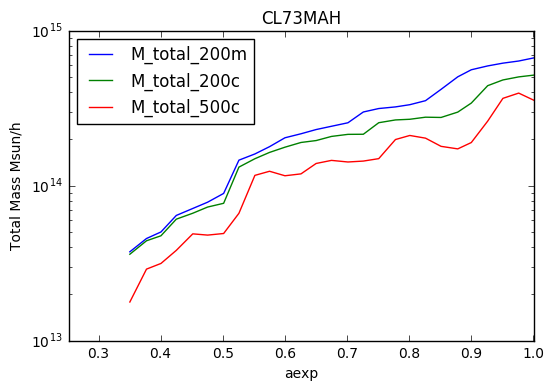

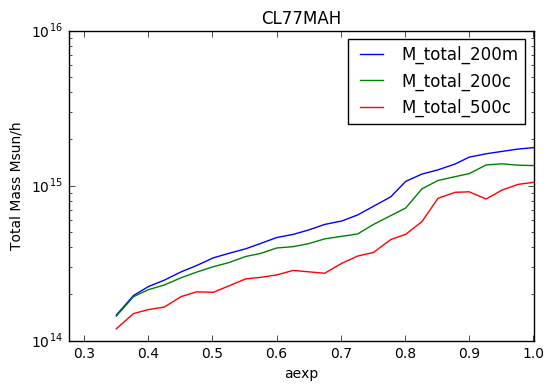

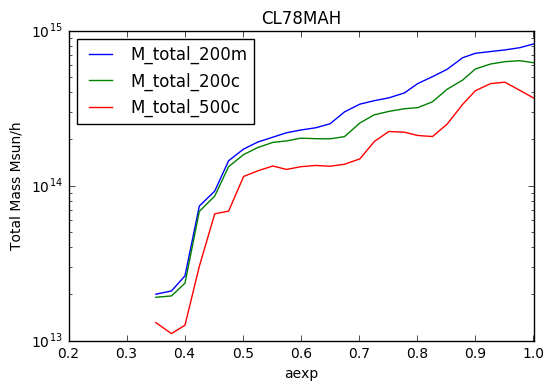

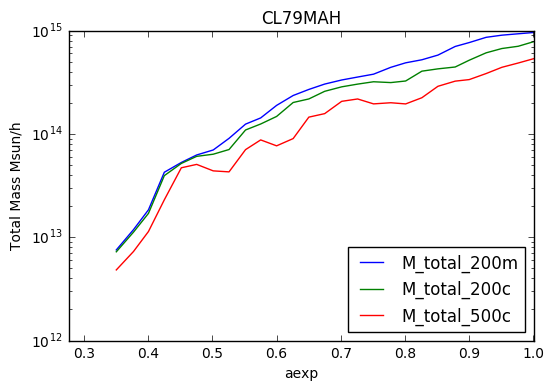

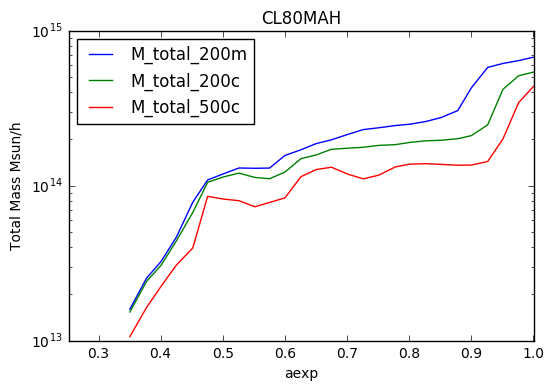

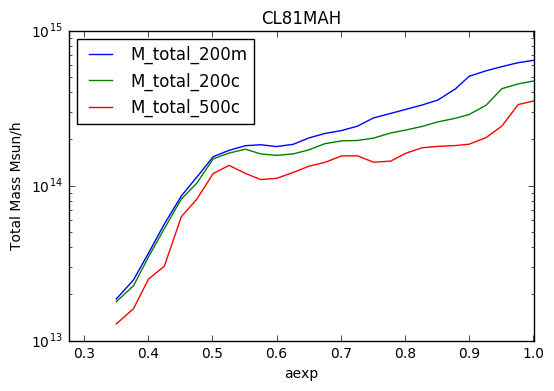

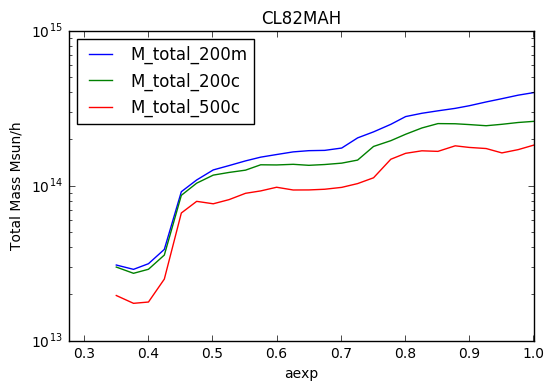

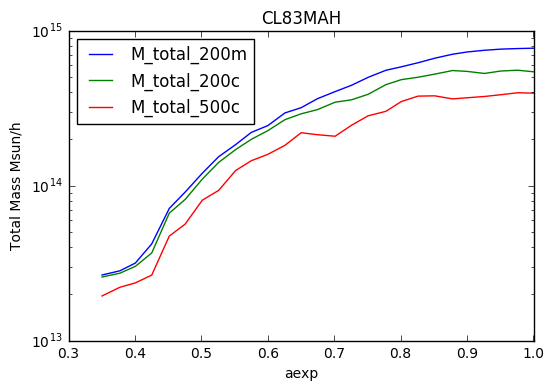

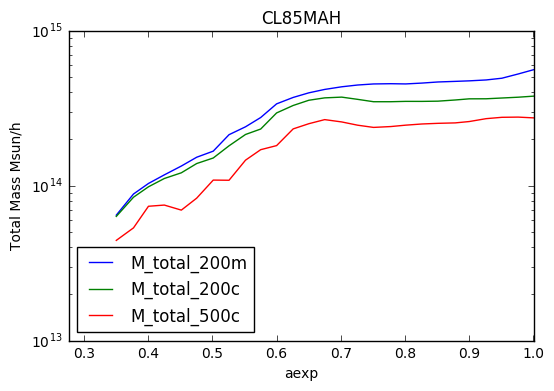

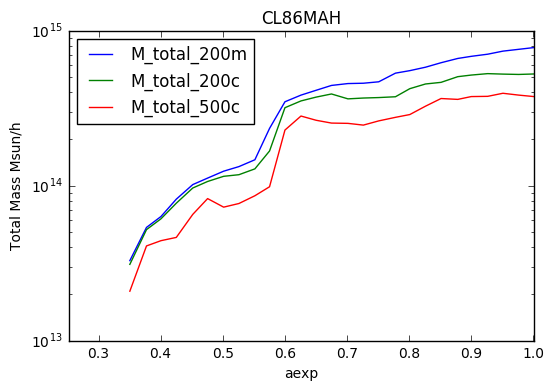

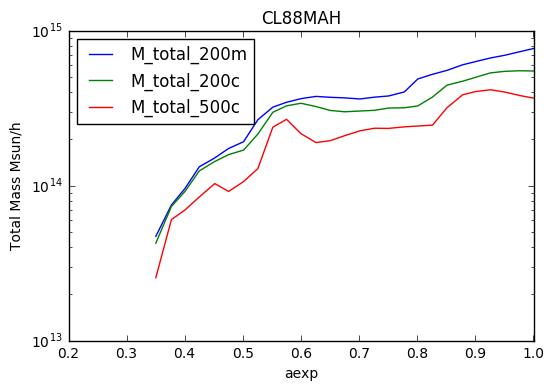

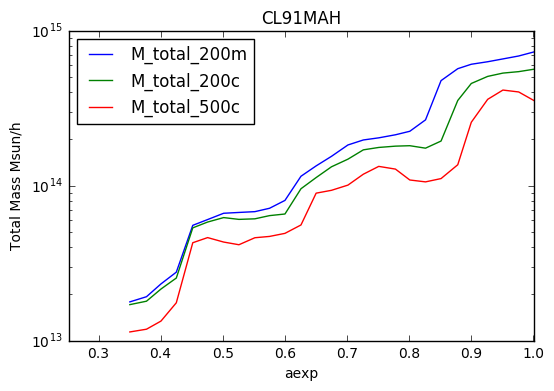

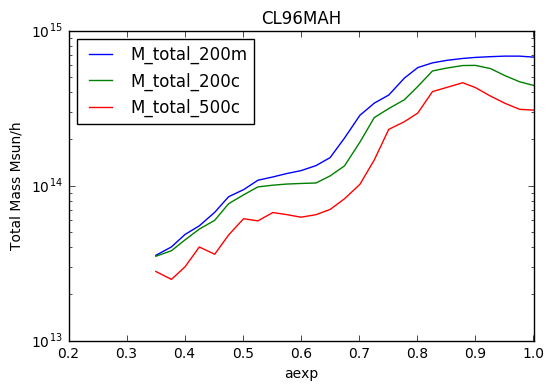

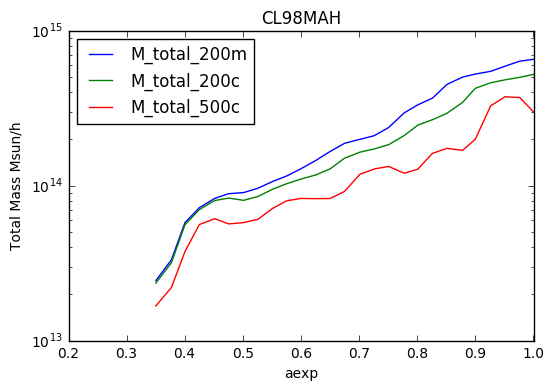

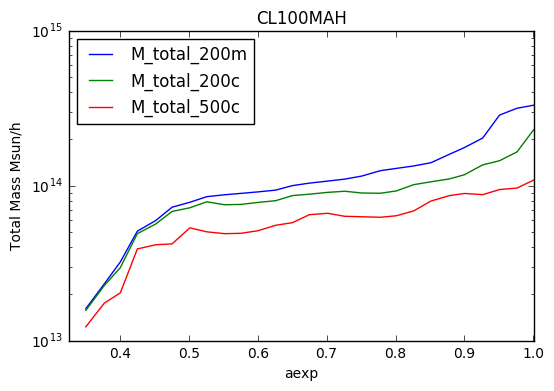

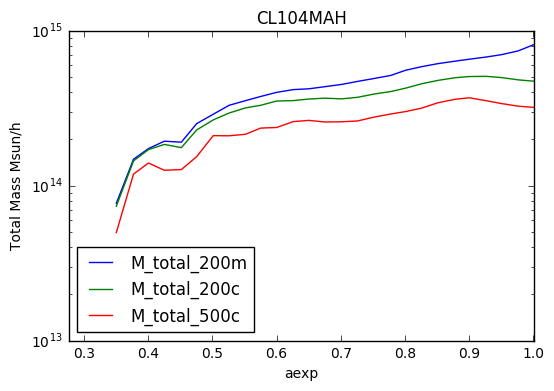

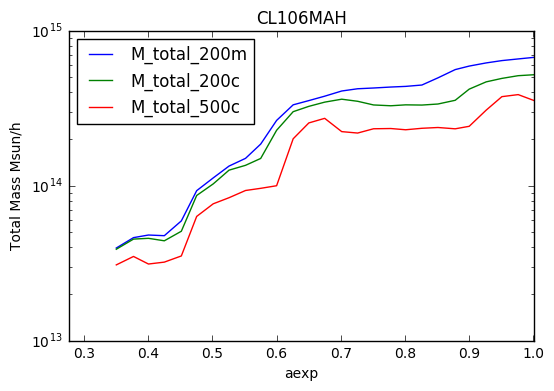

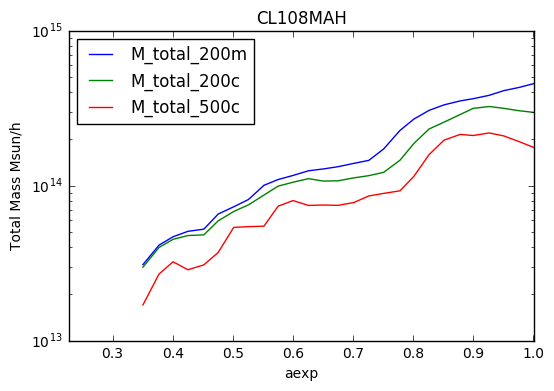

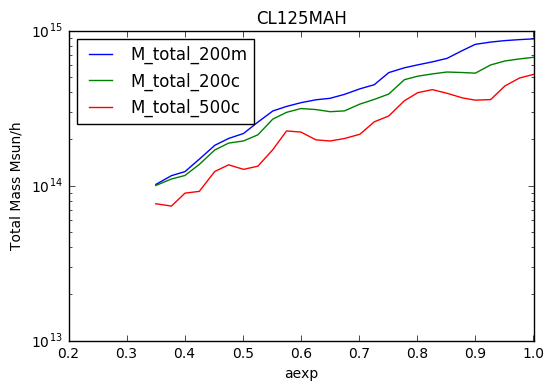

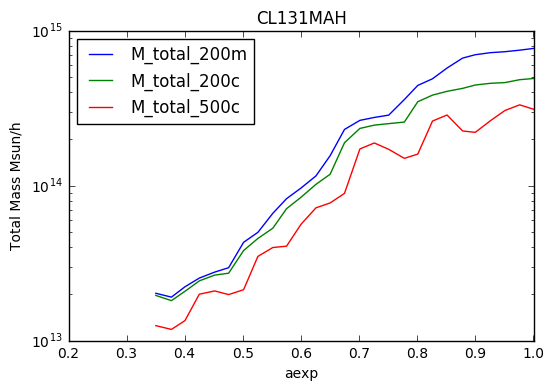

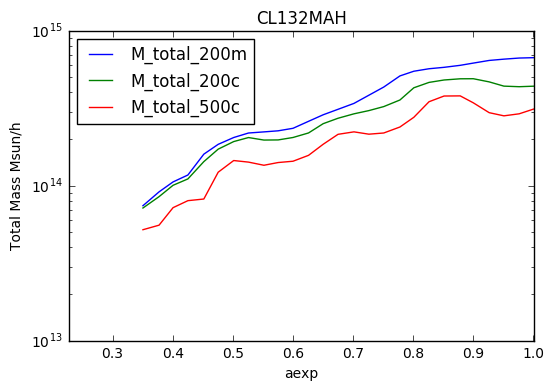

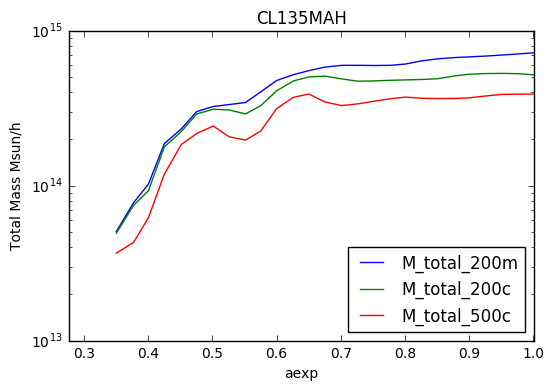

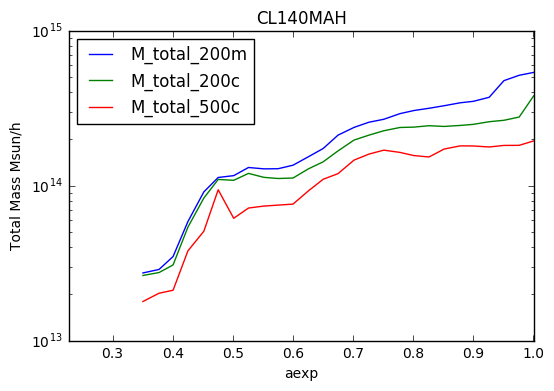

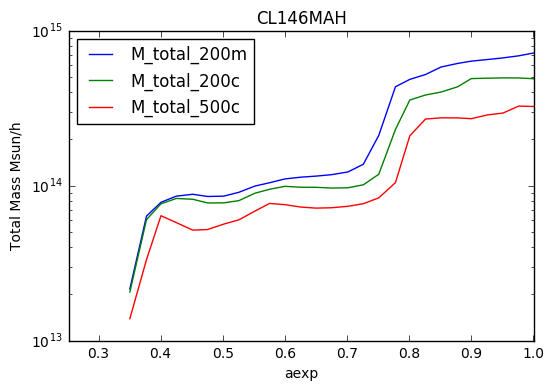

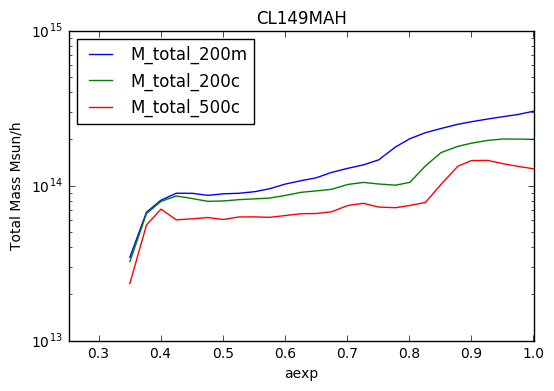

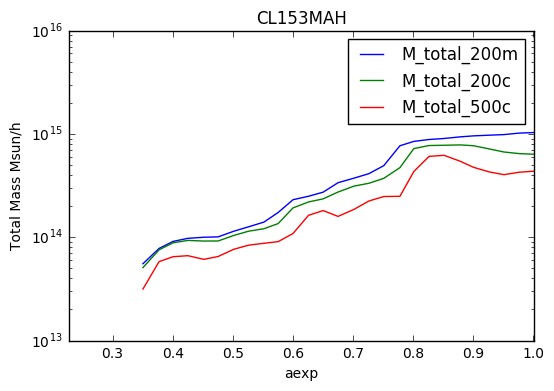

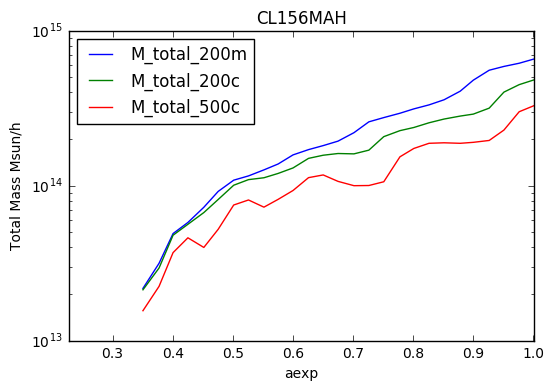

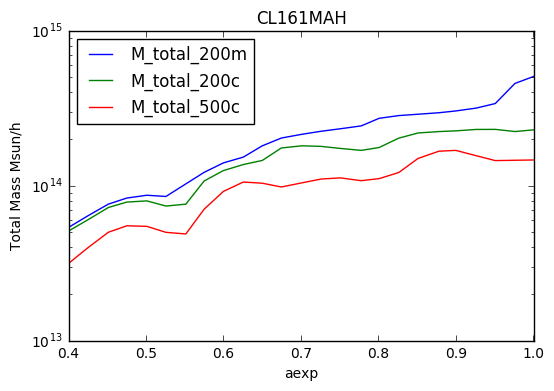

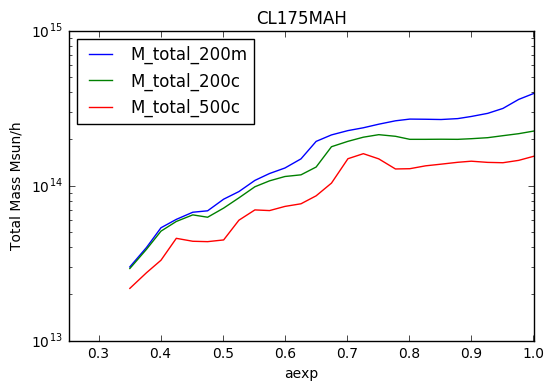

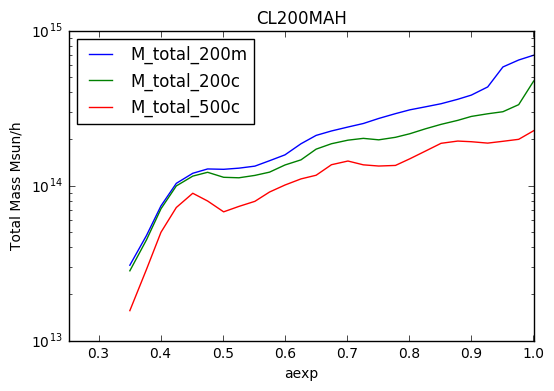

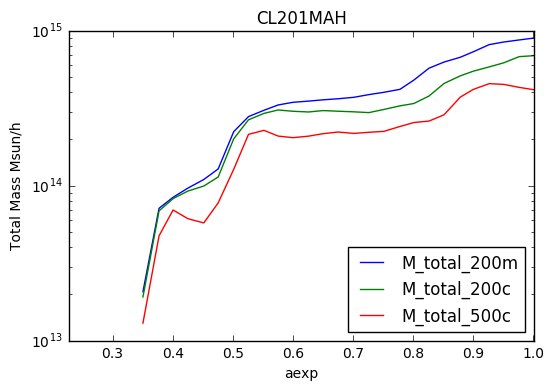

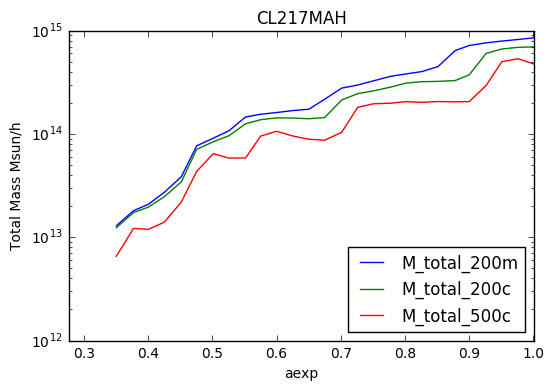

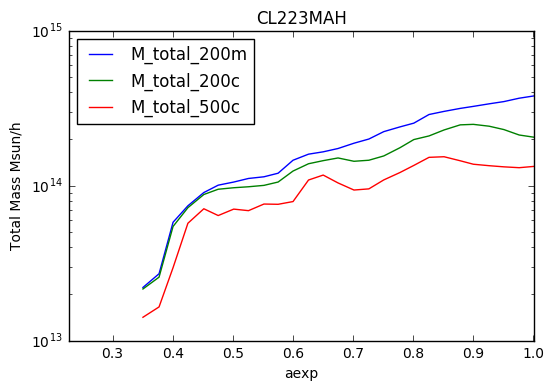

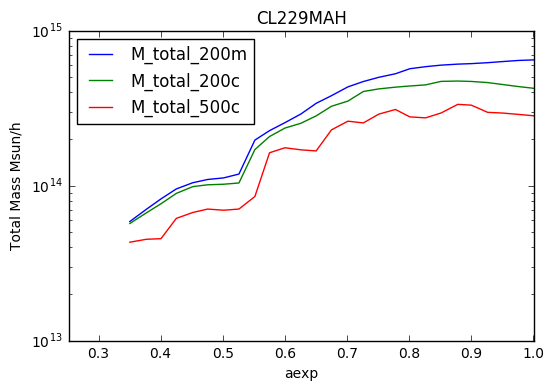

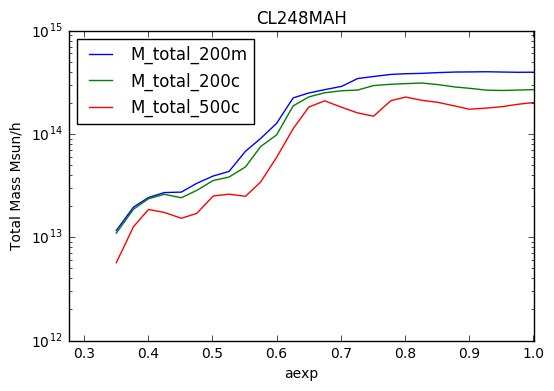

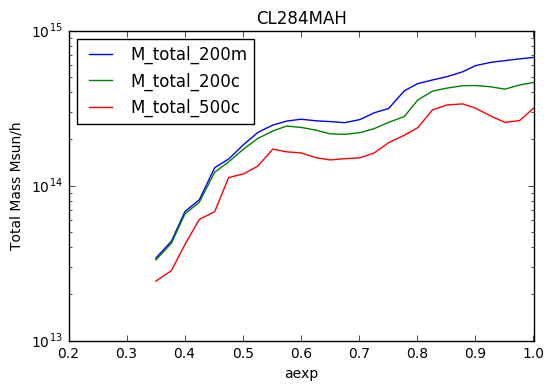

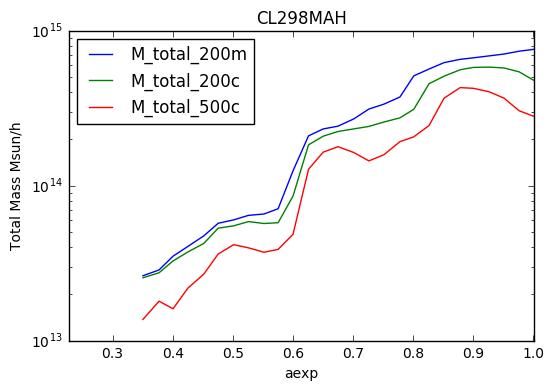

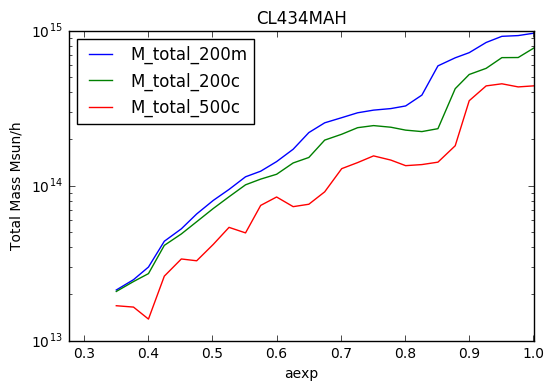

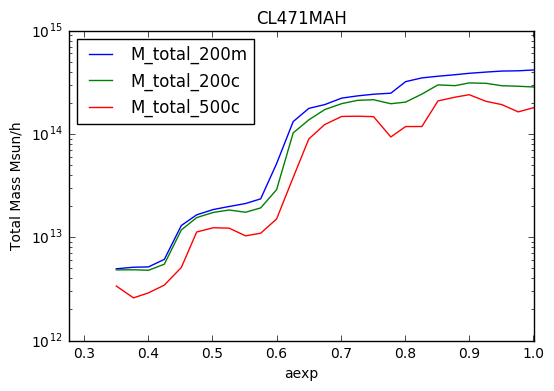

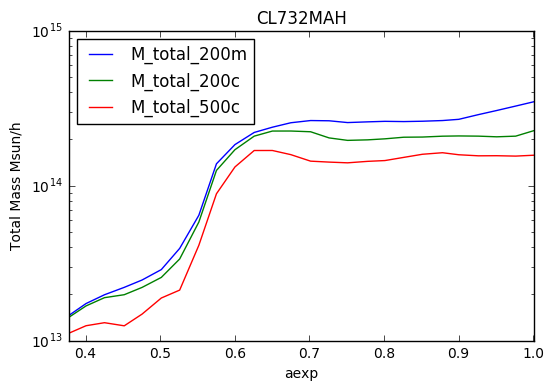

In [289]:
for name, group in groupbyz0id:
#     print(name)
    unit='Msun/h'## not sure if there is h
    ax=group.plot(x='aexp', y=['M_total_200m','M_total_200c','M_total_500c'], kind='line',title='CL'+str(int(name))+'MAH')
    plt.gca().invert_xaxis()
    ax.set_xlabel('aexp')
    ax.set_ylabel('Total Mass '+unit)
    plt.yscale('log')
    plt.show()

In [263]:
print df['mergers'].columns
df['mergers'][df['mergers']['z0_parent_id']==26]

Index([u'z0_parent_id', u'merger_aexp', u'main_line_id', u'merging_id',
       u'mass_ratio', u'impact_parameter', u'track_merging_aexp',
       u'num_shared_particles'],
      dtype='object')


,z0_parent_id,merger_aexp,main_line_id,merging_id,mass_ratio,impact_parameter,track_merging_aexp,num_shared_particles
140,26,0.3255,352,713,0.417371,217.363707,0.3255,5706
141,26,0.3001,335,17301,0.012937,459.908954,0.3001,64
142,26,0.2762,411,6233,0.021592,418.474861,0.2762,71
143,26,0.2762,411,8805,0.018987,55.854647,0.2762,52
144,26,0.2762,411,11991,0.027968,473.084887,0.2762,214
145,26,0.2268,176,1298,0.084841,101.736056,0.2268,540
146,26,0.2268,176,1588,0.080964,219.095127,0.2268,482
